In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import copy, cv2, glob, shutil

In [3]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile

In [4]:
class mC(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.96):
            self.model.stop_training = True
callbacks = mC()

In [8]:
lz = 'content/rockpaperscissor.zip'
zip_ref = zipfile.ZipFile(lz, 'r')
zip_ref.extractall('content/rockpaperscissors')
zip_ref.close()

In [9]:
base_dir = 'content/rockpaperscissors'
t_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissor_dir = os.path.join(base_dir, 'scissors')

In [10]:
os.mkdir(t_dir)
os.mkdir(val_dir)

In [11]:
tr = os.path.join(t_dir, 'rock')
tp = os.path.join(t_dir, 'paper')
ts = os.path.join(t_dir, 'scissor')
vr = os.path.join(val_dir, 'rock')
vp = os.path.join(val_dir, 'paper')
vs = os.path.join(val_dir, 'scissor')

In [12]:
os.mkdir(tr)
os.mkdir(tp)
os.mkdir(ts)
os.mkdir(vr)
os.mkdir(vp)
os.mkdir(vs)

In [13]:
train_sci_dir, val_sci_dir = train_test_split(os.listdir(scissor_dir), test_size = 0.40)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_pa_dir, val_pa_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)

In [14]:
for file in train_roc_dir:
    shutil.copy(os.path.join(rock_dir, file), os.path.join(tr, file))
for file in val_roc_dir:
    shutil.copy(os.path.join(rock_dir, file), os.path.join(vr, file))

for file in train_pa_dir:
    shutil.copy(os.path.join(paper_dir, file), os.path.join(tp, file))
for file in val_pa_dir:
    shutil.copy(os.path.join(paper_dir, file), os.path.join(vp, file))

for file in train_sci_dir:
    shutil.copy(os.path.join(scissor_dir, file), os.path.join(ts, file))
for file in val_sci_dir:
    shutil.copy(os.path.join(scissor_dir, file), os.path.join(vs, file))

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.35,
    fill_mode='nearest'
)

In [16]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.35,
    fill_mode='nearest'
)

In [17]:
train_generator = train_datagen.flow_from_directory(
    t_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.


In [18]:
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 876 images belonging to 3 classes.


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [20]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 30,
    validation_data = val_generator,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/30
41/41 - 76s - loss: 1.4753 - accuracy: 0.3994 - val_loss: 1.0160 - val_accuracy: 0.4954 - 76s/epoch - 2s/step
Epoch 2/30
41/41 - 62s - loss: 0.7480 - accuracy: 0.6791 - val_loss: 0.4614 - val_accuracy: 0.8333 - 62s/epoch - 2s/step
Epoch 3/30
41/41 - 65s - loss: 0.4192 - accuracy: 0.8384 - val_loss: 0.3192 - val_accuracy: 0.8893 - 65s/epoch - 2s/step
Epoch 4/30
41/41 - 66s - loss: 0.2926 - accuracy: 0.8971 - val_loss: 0.3470 - val_accuracy: 0.8744 - 66s/epoch - 2s/step
Epoch 5/30
41/41 - 66s - loss: 0.2578 - accuracy: 0.9101 - val_loss: 0.2443 - val_accuracy: 0.9087 - 66s/epoch - 2s/step
Epoch 6/30
41/41 - 66s - loss: 0.2229 - accuracy: 0.9276 - val_loss: 0.2265 - val_accuracy: 0.9224 - 66s/epoch - 2s/step
Epoch 7/30
41/41 - 65s - loss: 0.1661 - accuracy: 0.9489 - val_loss: 0.2148 - val_accuracy: 0.9178 - 65s/epoch - 2s/step
Epoch 8/30
41/41 - 65s - loss: 0.1738 - accuracy: 0.9421 - val_loss: 0.1579 - val_accuracy: 0.9509 - 65s/epoch - 2s/step
Epoch 9/30
41/41 - 64s - loss: 0

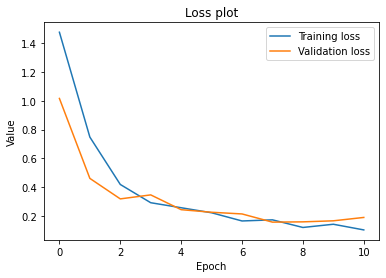

In [22]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss plot')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

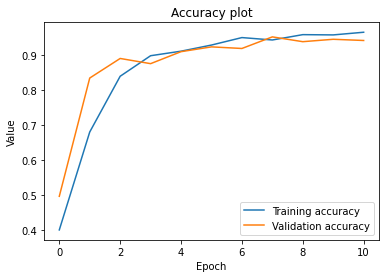

In [23]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='lower right')
plt.show()

In [36]:
uploaded = 'content/rockpaperscissors/uploaded'
for fn in os.listdir(uploaded):
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
    print(fn)

    if classes[0,0]!=0.0:
        print('paper')
    elif classes[0,1]!=0.0:
        print('rock')
    else:
        print('scissor')